# Bernoulli and Binomial Distribution - Lab

## Introduction
In this lab, you'll practice your newly gained knowledge on the Bernoulli and Binomial Distribution.

## Objectives
You will be able to:

* Apply the formulas for the Binomial and Bernoulli distribution to calculate the probability of a specific event
* Use `numpy` to randomly generate Binomial and Bernoulli trials
* Use `matplotlib` to show the output of generated Binomial and Bernoulli trials

## Apply the formulas for the Binomial and Bernoulli distributions

When playing a game of bowling, what is the probability of throwing exactly 3 strikes in a game with 10 rounds? Assume that the probability of throwing a strike is 25% for each round. Use the formula for the Binomial distribution to get to the answer. You've created this before, so we provide you with the function for factorials again:

In [1]:
def factorial(n):
    prod = 1
    while n >= 1:
        prod = prod * n
        n = n - 1
    return prod

In [7]:
combinatoric = factorial(10)/((factorial(10-3))*factorial(3))
p_3_strikes = combinatoric*(0.25**3)*((1-0.25)**(10-3))
p_3_strikes
#answer = 0.2502822

0.25028228759765625

Now, create a function for the Binomial distribution with three arguments $n$, $p$ and $k$ just like in the formula:

$$ \large P(Y=k)= \binom{n}{k} p^k(1-p)^{(n-k)}$$ 


In [8]:
def binom_distr(n,p,k):
    term1 = factorial(n)/((factorial(n-k))*factorial(k))
    term2 = p**k
    term3 = (1-p)**(n-k)
    return term1*term2*term3

Validate your previous result by applying your new function.

In [10]:
# Your code here
binom_distr(10,0.25,3)

0.25028228759765625

Now write a `for` loop along with your function to compute the probability that you have five strikes or more in one game. You'll want to use `numpy` here!

In [11]:
import numpy as np
prob = 0
for i in range (5,11):
    prob += binom_distr(10,0.25,i)
prob
# Your code here

0.07812690734863281

## Use a simulation to get the probabilities for all the potential outcomes

Repeat the experiment 5000 times.

In [15]:
# leave the random seed here for reproducibility of results
np.random.seed(123)
n = 5000
iteration = []
for experiment in range(0,n):
    iteration.append(np.random.binomial(10,0.25))
    np_it = np.array(iteration)

values, counts = np.unique(np_it, return_counts=True)
print(values)
print(counts)

[0 1 2 3 4 5 6 7 8]
[ 310  941 1368 1286  707  297   78   11    2]


In [16]:
# the results should look like this:
# [0 1 2 3 4 5 6 7 8]
# [ 310  941 1368 1286  707  297   78   11    2]

## Visualize these results

Create the PMF using these empirical results (that is, the proportions based on the values we obtained running the experiment 5000 times).

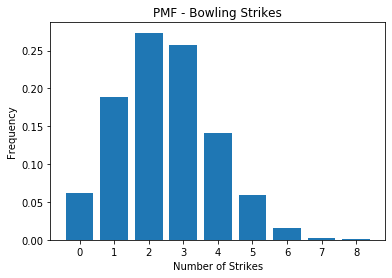

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.bar(values, counts/5000)
plt.xticks(values)
plt.xlabel('Number of Strikes')
plt.ylabel('Frequency')
plt.title('PMF - Bowling Strikes')
plt.show()

You should see that, with a 25% strike hit rate, even when simulating 5000 times, an almost perfect and/or perfect game of 9 and 10 strikes didn't even occur once! If you change the random seed, however, you'll see that perfect games will show up occasionally. 

Next, let's create the CDF based on these results. You can use `np.cumsum` to obtain cumulative probabilities.

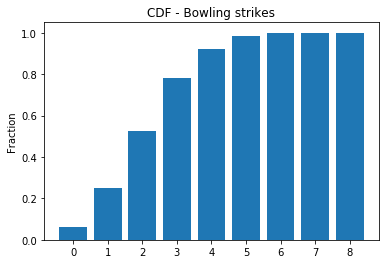

In [27]:
# Your code here
plt.bar(values, np.cumsum(counts/5000))
plt.xticks(values)
plt.ylabel('Fraction')
plt.title('CDF - Bowling strikes')
plt.show()

## Summary

Congratulations! In this lab, you practiced your newly gained knowledge of the Bernoulli and Binomial Distribution.